## TOPIC : Speech Emotion Recognition
## DATASET : RAVDESS

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Feature extraction and emotion mapping

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))             
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['neutral','angry','sad','happy']

# Dataset loading and visualisation

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("E:/a sem 6/ml lab/project/RAVDESS/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=400)

In [ ]:
from IPython.display import Audio
print("Neutral")
display(Audio('E:/a sem 6/ml lab/project/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav'))

print("Happy")
display(Audio('E:/a sem 6/ml lab/project/RAVDESS/Actor_05/03-01-03-02-01-02-05.wav'))

print("Sad")
display(Audio('E:/a sem 6/ml lab/project/RAVDESS/Actor_14/03-01-04-01-02-02-14.wav'))

print("Angry")
display(Audio('E:/a sem 6/ml lab/project/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav'))

Neutral


Happy


Sad


Angry


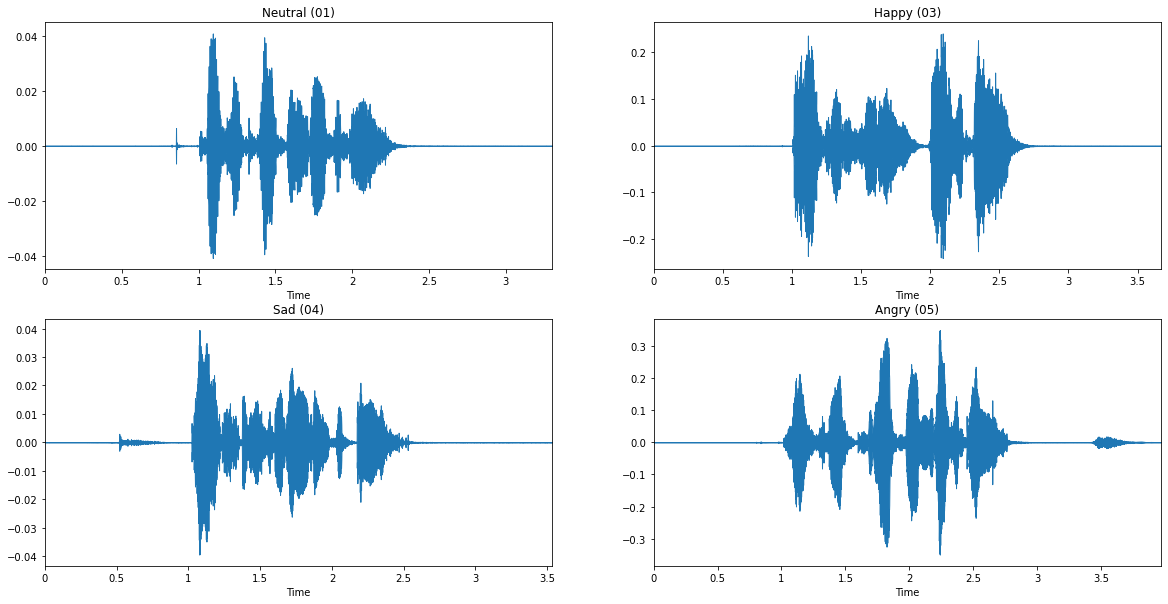

In [ ]:
# Example display of the waveform of the audio files
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
x, src = librosa.load('E:/a sem 6/ml lab/project/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav')
Audio(data=x, rate=src)
librosa.display.waveplot(x, src)
plt.title('Neutral (01)')

plt.subplot(2,2,2)
x, src = librosa.load('E:/a sem 6/ml lab/project/RAVDESS/Actor_21/03-01-03-02-02-01-21.wav')
Audio(data=x, rate=src)
librosa.display.waveplot(x, src)
plt.title('Happy (03)')

plt.subplot(2,2,3)
x, src = librosa.load('E:/a sem 6/ml lab/project/RAVDESS/Actor_14/03-01-04-01-02-02-14.wav')
Audio(data=x, rate=src)
librosa.display.waveplot(x, src)
plt.title('Sad (04)')

plt.subplot(2,2,4)
x, src = librosa.load('E:/a sem 6/ml lab/project/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav')
Audio(data=x, rate=src)
librosa.display.waveplot(x, src)
plt.title('Angry (05)')

plt.show()

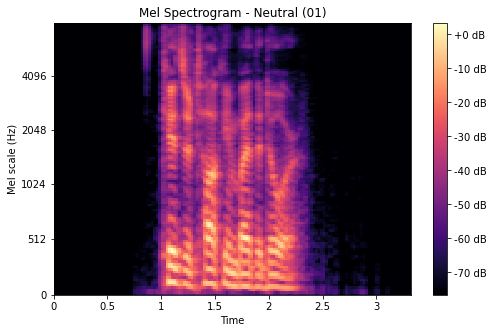

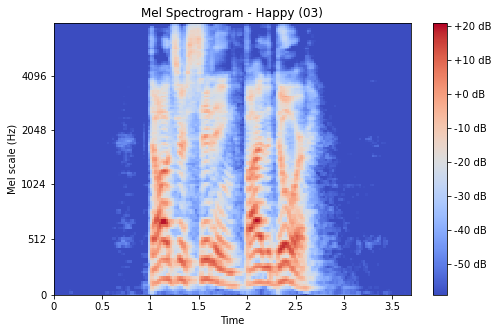

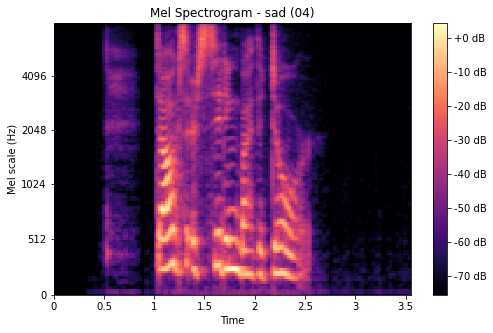

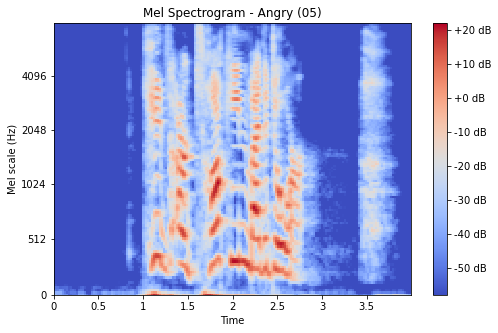

In [ ]:
#  Mel Spectrogram
x, src = librosa.load('E:/a sem 6/ml lab/project/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav')
spectrogram = librosa.feature.melspectrogram(y=x, sr=src, fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
plt.figure(figsize=(8,5))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', fmax=8000)
plt.xlabel("Time")
plt.ylabel("Mel scale (Hz)")
plt.title('Mel Spectrogram - Neutral (01)')
plt.colorbar(format='%+2.0f dB')


z, sr = librosa.load('E:/a sem 6/ml lab/project/RAVDESS/Actor_21/03-01-03-02-02-01-21.wav')
spectrogram = librosa.feature.melspectrogram(y=z, sr=sr, fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
plt.figure(figsize=(8,5))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', fmax=8000)
plt.xlabel("Time")
plt.ylabel("Mel scale (Hz)")
plt.title('Mel Spectrogram - Happy (03)')
plt.colorbar(format='%+2.0f dB')

w, s = librosa.load('E:/a sem 6/ml lab/project/RAVDESS/Actor_14/03-01-04-01-02-02-14.wav')
spectrogram = librosa.feature.melspectrogram(y=w, sr=s, fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
plt.figure(figsize=(8,5))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', fmax=8000)
plt.xlabel("Time")
plt.ylabel("Mel scale (Hz)")
plt.title('Mel Spectrogram - sad (04)')
plt.colorbar(format='%+2.0f dB')

q, rc = librosa.load('E:/a sem 6/ml lab/project/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav')
spectrogram = librosa.feature.melspectrogram(y=q, sr=rc, fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
plt.figure(figsize=(8,5))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', fmax=8000)
plt.xlabel("Time")
plt.ylabel("Mel scale (Hz)")
plt.title('Mel Spectrogram - Angry (05)')
plt.colorbar(format='%+2.0f dB')
plt.show()

### APPROACH 1

**Train-test split (90:10)**

In [ ]:
x_train,x_test,y_train,y_test = load_data(test_size=0.1)

In [ ]:
print("Size of training dataset : ", x_train.shape[0])
print("Size of testing dataset : ", x_test.shape[0])
print("Number of features : ", x_train.shape[1])

Size of training dataset :  604
Size of testing dataset :  68
Number of features :  180


In [ ]:
# normalising the data

mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

In [ ]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.03%


In [ ]:
from sklearn.metrics import accuracy_score

# using KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN: ",accuracy_score(y_test, y_pred))


# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Logistic Regression: ",accuracy_score(y_test, y_pred))


# using naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Naive Bayes: ",accuracy_score(y_test, y_pred))

# linear SVM
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Linear SVM: ",accuracy_score(y_test, y_pred))

# Polynomial SVM classifier
clf = svm.SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Polynomial SVM:",accuracy_score(y_test, y_pred))

# gaussian SVM classifier
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Gaussian SVM:",accuracy_score(y_test, y_pred))

# using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.predict(x_test)
print("Decision Tree:",accuracy_score(y_test, y_pred))

KNN:  0.6753246753246753
Logistic Regression:  0.6623376623376623
Naive Bayes:  0.5324675324675324
Linear SVM:  0.7012987012987013
Polynomial SVM: 0.44155844155844154
Gaussian SVM: 0.5454545454545454
Decision Tree: 0.5454545454545454


In [ ]:
from sklearn import svm

In [ ]:
print("Actual emotion : Neutral (N)")
display(Audio('E:/a sem 6/ml lab/project/new/03a04Nc.wav'))
input = glob.glob("E:/a sem 6/ml lab/project/new/03a04Nc.wav")[0]
extracted = [extract_feature(input, mfcc=True, chroma=True, mel=True)]
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
predicted = clf.predict(extracted)
print("Predicted emotion : ", predicted)

Actual emotion : Neutral (N)


Predicted emotion :  ['neutral']


In [ ]:
print("Actual emotion : Sad (T)")
display(Audio('E:/a sem 6/ml lab/project/new/08a07Ta.wav'))
input = glob.glob("E:/a sem 6/ml lab/project/new/08a07Ta.wav")[0]
extracted = [extract_feature(input, mfcc=True, chroma=True, mel=True)]
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
predicted = clf.predict(extracted)
print("Predicted emotion : ", predicted)

Actual emotion : Sad (T)


Predicted emotion :  ['sad']


In [ ]:
print("Actual emotion : Happy (F)")
display(Audio('E:/a sem 6/ml lab/project/new/08b01Fe.wav'))
input = glob.glob("E:/a sem 6/ml lab/project/new/08b01Fe.wav")[0]
extracted = [extract_feature(input, mfcc=True, chroma=True, mel=True)]
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(x_train, y_train)
predicted = clf.predict(extracted)
print("Predicted emotion : ", predicted)

Actual emotion : Happy (F)


Predicted emotion :  ['angry']


In [ ]:
print("Actual emotion : Angry (W)")
display(Audio('E:/a sem 6/ml lab/project/new/03a05Wb.wav'))
input = glob.glob("E:/a sem 6/ml lab/project/new/03a05Wb.wav")[0]
extracted = [extract_feature(input, mfcc=True, chroma=True, mel=True)]
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(x_train, y_train)
predicted = clf.predict(extracted)
print("Predicted emotion : ", predicted)

Actual emotion : Angry (W)


Predicted emotion :  ['angry']


**Test train split (75:25)**

In [ ]:
x_train,x_test,y_train,y_test = load_data(test_size=0.25)

In [ ]:
print("Size of training dataset : ", x_train.shape[0])
print("Size of testing dataset : ", x_test.shape[0])
print("Number of features : ", x_train.shape[1])

Size of training dataset :  504
Size of testing dataset :  168
Number of features :  180


In [ ]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# using KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN: ",accuracy_score(y_test, y_pred))


# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Logistic Regression: ",accuracy_score(y_test, y_pred))


# using naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Naive Bayes: ",accuracy_score(y_test, y_pred))

# linear SVM
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Linear SVM: ",accuracy_score(y_test, y_pred))

# Polynomial SVM classifier
clf = svm.SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Polynomial SVM:",accuracy_score(y_test, y_pred))

# gaussian SVM classifier
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Gaussian SVM:",accuracy_score(y_test, y_pred))

# using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.predict(x_test)
print("Decision Tree:",accuracy_score(y_test, y_pred))

KNN:  0.5952380952380952
Logistic Regression:  0.6488095238095238
Naive Bayes:  0.38095238095238093
Linear SVM:  0.6071428571428571
Polynomial SVM: 0.43452380952380953
Gaussian SVM: 0.49404761904761907
Decision Tree: 0.49404761904761907


### APPROACH 2

In [ ]:
import librosa
from librosa import feature
import numpy as np

fn_list_i = [
    feature.mfcc,
    feature.melspectrogram,
    feature.chroma_stft,
    feature.tonnetz,
    feature.spectral_contrast,
    feature.spectral_centroid,
    feature.spectral_bandwidth,
    feature.spectral_rolloff
]
  
fn_list_ii = [
    feature.rms,
    feature.zero_crossing_rate
]

def get_feature_vector(y, sr, details):  
  feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
  feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii]
  
  feature_vector = details + feat_vect_i + feat_vect_ii
  return feature_vector

In [ ]:
norm_audios_feat = []

for file in glob.glob("E:/a sem 6/ml lab/project/RAVDESS/Actor_*/*.wav"):
  details = []
  y,sr = librosa.load(file)  
  file_name = os.path.basename(file)
  actor = file_name.split("-")[6].split(".")[0]
  details.append(actor)
  emotion = emotions[file_name.split("-")[2]]
  if emotion not in observed_emotions:
    continue
  details.append(emotion)
  emo_num = file_name.split("-")[2]
  details.append(emo_num)
  feature_vector = get_feature_vector(y, sr, details) 
  norm_audios_feat.append(feature_vector)

In [ ]:
print(norm_audios_feat[3])

['01', 'neutral', '01', -31.88959, 0.0053182314, 0.5765792, -0.007945563225544832, 20.75010551450886, 2410.3112263550656, 1896.6488702832276, 4588.5369739393245, 0.0026076145, 0.2659635891879562]


In [ ]:
import csv

norm_output = 'audio_features.csv'

header =[
    'actor',
    'emotion',
    'emotion_no',
    'mfcc',
    'mel',
    'chroma_stft',
    'tonnetz',
    'contrast',
    'spectral_centroid',
    'spectral_bandwidth',
    'spectral_rolloff',
    'rmse',
    'zero_crossing_rate'
]

with open(norm_output,'+w') as f:
  csv_writer = csv.writer(f, delimiter = ',')
  csv_writer.writerow(header)
  csv_writer.writerows(norm_audios_feat)

In [ ]:
import pandas as pd
df_new = pd.read_csv("audio_features.csv")
df_new

actor  emotion  emotion_no       mfcc       mel  chroma_stft   tonnetz  \
0        1  neutral           1 -32.807700  0.003607     0.527520 -0.009763   
1        1  neutral           1 -32.479942  0.004185     0.578767 -0.017308   
2        1  neutral           1 -32.543083  0.005791     0.568540  0.002182   
3        1  neutral           1 -31.889590  0.005318     0.576579 -0.007946   
4        1    happy           3 -31.603222  0.011744     0.572147 -0.004716   
..     ...      ...         ...        ...       ...          ...       ...   
667     24    angry           5 -29.277710  0.171498     0.407808 -0.003955   
668     24    angry           5 -26.239937  0.633175     0.350892 -0.005309   
669     24    angry           5 -27.767973  0.333353     0.353664 -0.015290   
670     24    angry           5 -28.205618  0.175044     0.408414 -0.014972   
671     24    angry           5 -29.448195  0.218528     0.368775  0.003951   

      contrast  spectral_centroid  spectral_bandwidth  spectral_rolloff  \
0    20.301129        2325.654606         1713.679010       4193.854827   
1    21.080593        2516.340512         1890.928483       4633.377075   
2    20.375430        2412.974080         1881.068026       4555.036050   
3    20.750106        2410.311226         1896.648870       4588.536974   
4    21.652246        2336.381225         1870.657153       4444.596680   
..         ...                ...                 ...               ...   
667  24.007186        2290.365582         1686.486313       4196.075909   
668  24.063979        2141.168402         1630.660722       4072.794596   
669  23.876700        1999.646729         1508.482465       3710.774740   
670  23.310420        2289.074764         1634.349069       4108.654785   
671  24.331230        2221.997212         1573.405166       4004.099121   

         rmse  zero_crossing_rate  
0    0.002253            0.199840  
1    0.002416            0.222209  
2    0.002804            0.227726  
3    0.002608            0.265964  
4    0.004259            0.268639  
..        ...                 ...  
667  0.017093            0.224443  
668  0.030802            0.199291  
669  0.023520            0.191998  
670  0.017086            0.224178  
671  0.019138            0.227117  

[672 rows x 13 columns]

In [ ]:
df_new["emotion"].unique()

array(['neutral', 'happy', 'sad', 'angry'], dtype=object)

In [ ]:
# considering only mfcc, mel, chroma, contrast, rmse, zero_crossing_rate
x_train,x_test,y_train,y_test = train_test_split(df_new.iloc[:,[3,4,5,7,-2,-1]].values, df_new.iloc[:,1],test_size = 0.2, random_state = 10)

In [ ]:
# normalising the data

mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

In [ ]:
from sklearn.metrics import accuracy_score

# using KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN: ",accuracy_score(y_test, y_pred))


# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Logistic Regression: ",accuracy_score(y_test, y_pred))


# using naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Naive Bayes: ",accuracy_score(y_test, y_pred))

# linear SVM
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Linear SVM: ",accuracy_score(y_test, y_pred))

# Polynomial SVM classifier
clf = svm.SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Polynomial SVM:",accuracy_score(y_test, y_pred))

# gaussian SVM classifier
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Gaussian SVM:",accuracy_score(y_test, y_pred))

# using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.predict(x_test)
print("Decision Tree:",accuracy_score(y_test, y_pred))

KNN:  0.4148148148148148
Logistic Regression:  0.37777777777777777
Naive Bayes:  0.48148148148148145
Linear SVM:  0.4148148148148148
Polynomial SVM: 0.4222222222222222
Gaussian SVM: 0.4222222222222222
Decision Tree: 0.4222222222222222


In [ ]:
import plotly.express as px

In [ ]:
# 01 : Neutral, 03 : Happy, 04 : Sad, 05 : Angry
import plotly.express as px
dim = ['mfcc', 'mel', 'chroma_stft', 'contrast','rmse','zero_crossing_rate','emotion_no']
fig = px.parallel_coordinates(df_new, color = 'emotion_no', dimensions=dim)
fig.show()

In [ ]:
import plotly.express as px
dim = ['tonnetz', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff','emotion_no']
fig = px.parallel_coordinates(df_new, color = 'emotion_no', dimensions=dim)
fig.show()